<a href="https://colab.research.google.com/github/clementlowfuxing/ML-From-Scratch/blob/master/text_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TEXT CLEANING & PRE-PROCESSING** 




In Natural Language Processing (NLP), most of the text and documents contain many words that are redundant for text classification, such as stopwords, miss-spellings, slangs, and etc. In this section, we briefly explain some techniques and methods for text cleaning and pre-processing text documents. In many algorithms like statistical and probabilistic learning methods, noise and unnecessary features can negatively affect the overall perfomance. So, elimination of these features are extremely important.

**TOKENIZATION**

Tokenization is the process of breaking down a stream of text into words, phrases, symbols, or any other meaningful elements called tokens. The main goal of this step is to extract individual words in a sentence. Along with text classifcation, in text mining, it is necessay to incorporate a parser in the pipeline which performs the tokenization of the documents; for example:

sentence:



In [ ]:
After sleeping for four hours, he decided to sleep for another four


In this case, the tokens are as follows:



In [ ]:
{'After', 'sleeping', 'for', 'four', 'hours', 'he', 'decided', 'to', 'sleep', 'for', 'another', 'four'}


Here is python code for Tokenization:



In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text = "After sleeping for four hours, he decided to sleep for another four"
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['After', 'sleeping', 'for', 'four', 'hours', ',', 'he', 'decided', 'to', 'sleep', 'for', 'another', 'four']


**STOPWORDS** 

**What are stop words?**
A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. You can find them in the nltk_data directory. home/pratima/nltk_data/corpora/stopwords is the directory address.(Do not forget to change your home directory name)

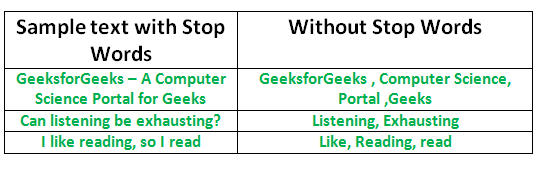

Text and document classification over social media, such as Twitter, Facebook, and so on is usually affected by the noisy nature (abbreviations, irregular forms) of the text corpuses.

In [10]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example_sent = "This is a sample sentence, showing off the stop words filtration."

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
['This', 'sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


**CAPITALIZATION**

Sentences can contain a mixture of uppercase and lower case letters. Multiple sentences make up a text document. To reduce the problem space, the most common approach is to reduce everything to lower case. This brings all words in a document in same space, but it often changes the meaning of some words, such as "US" to "us" where first one represents the United States of America and second one is a pronoun. To solve this, slang and abbreviation converters can be applied.

In [11]:
text = "The United States of America (USA) or America, is a federal republic composed of 50 states"
print(text)
print(text.lower())

The United States of America (USA) or America, is a federal republic composed of 50 states
the united states of america (usa) or america, is a federal republic composed of 50 states


**Noise Removal**

Another issue of text cleaning as a pre-processing step is noise removal. Text documents generally contains characters like punctuations or special characters and they are not necessary for text mining or classification purposes. Although punctuation is critical to understand the meaning of the sentence, but it can affect the classification algorithms negatively.

Here is simple code to remove standard noise from text:

In [15]:
def text_cleaner(text):
    rules = [
        {r'>\s+': u'>'},  # remove spaces after a tag opens or closes
        {r'\s+': u' '},  # replace consecutive spaces
        {r'\s*<br\s*/?>\s*': u'\n'},  # newline after a <br>
        {r'</(div)\s*>\s*': u'\n'},  # newline after </p> and </div> and <h1/>...
        {r'</(p|h\d)\s*>\s*': u'\n\n'},  # newline after </p> and </div> and <h1/>...
        {r'<head>.*<\s*(/head|body)[^>]*>': u''},  # remove <head> to </head>
        {r'<a\s+href="([^"]+)"[^>]*>.*</a>': r'\1'},  # show links instead of texts
        {r'[ \t]*<[^<]*?/?>': u''},  # remove remaining tags
        {r'^\s+': u''}  # remove spaces at the beginning
    ]
    for rule in rules:
      for (k, v) in rule.items():
        regex = re.compile(k)
        text = regex.sub(v, text)
        text = text.rstrip()
    return text.lower() 

In [22]:
import regex as re
text = "   The United  States of America (USA) or America, is a federal republic composed of 50 states. "
print(text)
print(text_cleaner(text))

   The United  States of America (USA) or America, is a federal republic composed of 50 states. 
the united states of america (usa) or america, is a federal republic composed of 50 states.


**SPELLING CORRECTION** 

An optional part of the pre-processing step is correcting the misspelled words. Different techniques, such as hashing-based and context-sensitive spelling correction techniques, or spelling correction using trie and damerau-levenshtein distance bigram have been introduced to tackle this issue.

In [32]:
!pip install autocorrect
from autocorrect import Speller
 
check = Speller(lang='en')
check("does this sentece have misspelled wordz?")


     |████████████████████████████████| 1.8MB 2.8MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.0.0-cp36-none-any.whl size=1811641 sha256=6a4eed4afa987f92b16f1f2fb7279ac2aae80323497ca82e60b5ead7eb2a9b13
  Stored in directory: /root/.cache/pip/wheels/0b/06/bc/e66f28d72bed29591eadc79cebb2e7964ad0282804ab233da3
Successfully built autocorrect


'does this sentence have misspelled words?'

In [35]:
from autocorrect import spell

print(spell('caaaar'))
print(spell(u'mussage'))
print(spell(u'survice'))
print(spell(u'hte'))

autocorrect.spell is deprecated,             use autocorrect.Speller instead
caesar
autocorrect.spell is deprecated,             use autocorrect.Speller instead
message
autocorrect.spell is deprecated,             use autocorrect.Speller instead
service
autocorrect.spell is deprecated,             use autocorrect.Speller instead
the


**TextBlob**
To use TextBlob’s spellchecking functionality, we just need to import the Word class. Then we can input a word and check its spelling using the spellcheck method, like below.

In [36]:
from textblob import Word
 
word = Word('percieve')
 
word.spellcheck()
 
# [('perceive', 1.0)]

[('perceive', 1.0)]

As can be seen above, TextBlob returns two pieces – a recommended correction for this word, and a confidence score associated with the correction. In this case, we just get one word back with a confidence of 1.0, or 100%.

Let’s try another word that returns multiple possibilities. If we input the string “personell”, we get a list of possible corrections with confidence scores because this string is fairly similar in spelling to a few different words.

In [37]:
word = Word('personell')
word.spellcheck()
 
#[('personal', 0.65),
#('personally', 0.2642857142857143),
# ('peroneal', 0.06428571428571428),
# ('personnel', 0.014285714285714285),
# ('personen', 0.007142857142857143)]

[('personal', 0.65),
 ('personally', 0.2642857142857143),
 ('peroneal', 0.06428571428571428),
 ('personnel', 0.014285714285714285),
 ('personen', 0.007142857142857143)]

According to its documentation, TextBlob’s spelling correction feature is about 70% accurate.

**A few caveats**
It’s important to keep in mind that no programmatic spell checker is perfect. However, Python does have several pre-made options available, as described above, but you could also potentially build your own as well using fuzzy matching. Also, words outside of context make it more difficult to determine the correct spelling if the misspelled string is similar to multiple words. For example, take the string “liberry”. This is a known misspelling for library. However, it is also just one letter off from liberty.

If we use one of the packages above, we get the word “liberty” returned, which is not illogical, as the string is very close in spelling, but context could help reveal which word makes the most sense. For building a contextual spell checker in Python, you might want to check out recurrent neural networks or Markov models.

In [41]:
!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()
spell.correction("liberry") # liberty
 
word = Word("liberry")
word.spellcheck() # liberty
 
check("liberry") # liberty

'liberty'